<a href="https://colab.research.google.com/github/sherlock216/20251R0136COSE47101/blob/main/GMM_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilistic Clustering is different from K-Means clustering. It assigns a probability to each data point indicating the likelihood of belonging to each cluster. GMM(Gaussian Mixture Model) is a common probabilistic clustering model.

It assumes a mixture of Gaussian distributions, and it has E-Step and M-Step.
E-Step: Calculate the probability that each data point belongs to each other, based on the current parameters.
M-Step: Update the parameters of each Gaussian distribution to maximize the likelihood of the data given the model.

# 1. Preparing the dataset for clustering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import glob
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# Í≤ΩÎ°úÏóê ÏûàÎäî Î™®Îì† github_profiles*.csv ÌååÏùºÏùÑ Ï∞æÏùå
file_path = '/content/drive/MyDrive/Colab Notebooks/COSE471/test/results2/github_profiles_total_v2.csv'

# 2. CSV Î°úÎìú + Ïª¨Îüº Ïù¥Î¶Ñ Í≥µÎ∞± Ï†úÍ±∞
df = pd.read_csv(file_path, index_col=False).fillna(0)
df.columns = df.columns.str.strip()  # ‚Üê Ïó¨Í∏∞ÏóêÏÑú Ïª¨Îüº Ïù¥Î¶Ñ Í≥µÎ∞± Ï†úÍ±∞

print(f"Ï¥ù {len(df)}Í∞úÏùò ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å")
print(f"Ïª¨Îüº Ïù¥Î¶Ñ: {list(df.columns)}")

Ï¥ù 3799Í∞úÏùò ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å
Ïª¨Îüº Ïù¥Î¶Ñ: ['user_ID', 'username', 'repo_count', 'Assembly', 'C', 'C++', 'C#', 'Dart', 'Go', 'Java', 'JavaScript', 'Kotlin', 'MATLAB', 'PHP', 'Python', 'Ruby', 'Rust', 'Scala', 'Swift', 'TypeScript']


In [4]:
print(len(df))

3799


In [5]:
# repo_count Í∏∞Ï§ÄÏúºÎ°ú df ÏûêÏ≤¥Î•º ÌïÑÌÑ∞ÎßÅ
df = df[df.iloc[:, 2] >= 6].reset_index(drop=True)

# ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
language_columns = df.columns[2:]
X = df[language_columns].values

In [30]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# 2. What if we do PCA for displaying with graphs?

In [14]:
# PCAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 2Ï∞®ÏõêÏúºÎ°ú Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [15]:
# EM ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
n_components = 4  # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(X_pca)

In [16]:
# 5. 2D Í≥µÍ∞Ñ Í∑∏Î¶¨Îìú ÏÉùÏÑ±
x = np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 200)
y = np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 200)
X_grid, Y_grid = np.meshgrid(x, y)
XX = np.array([X_grid.ravel(), Y_grid.ravel()]).T

In [17]:
# Predict cluster each data point belongs to
Z = gmm.predict_proba(XX)

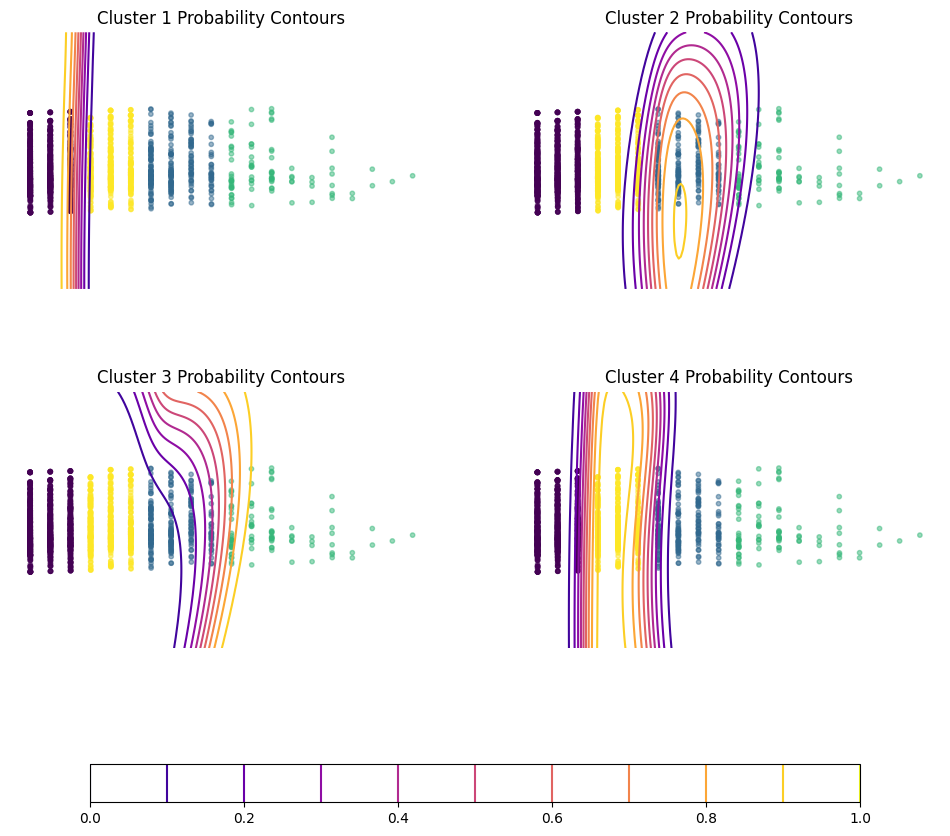

In [18]:
# 7. ÏãúÍ∞ÅÌôî (ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌôïÎ•† Ïª®Ìà¨Ïñ¥)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i in range(4):
    ax = axes[i // 2, i % 2]
    Z_i = Z[:, i].reshape(X_grid.shape)

    contour = ax.contour(X_grid, Y_grid, Z_i, levels=10, cmap='plasma')
    ax.set_title(f"Cluster {i+1} Probability Contours")
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10, alpha=0.5)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_axis_off()

plt.subplots_adjust(hspace=0.4)
fig.colorbar(contour, ax=axes, orientation='horizontal', fraction=0.05)
plt.show()

In [19]:
# Probability each data point of being part of a certain cluster
probs = gmm.predict_proba(X_pca)
probs[0]

array([2.71644638e-20, 5.86934686e-01, 4.12984460e-01, 8.08542740e-05])

In [20]:
from sklearn.metrics import silhouette_score, pairwise_distances

# Silhouette Score Í≥ÑÏÇ∞
labels = gmm.predict(X_pca)
sil_score = silhouette_score(X_pca, labels)
print('Silhouette coefficient of GMM:', sil_score)

# Dunn Index Ìï®Ïàò Ï†ïÏùò
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    distances = pairwise_distances(X)

    inter_cluster_distances = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == i]
            cluster_j = X[labels == j]
            inter_dist = np.min(pairwise_distances(cluster_i, cluster_j))
            inter_cluster_distances.append(inter_dist)

    intra_cluster_distances = []
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        intra_dist = np.max(pairwise_distances(cluster_i))
        intra_cluster_distances.append(intra_dist)

    min_inter = np.min(inter_cluster_distances)
    max_intra = np.max(intra_cluster_distances)

    return min_inter / max_intra

# Dunn Index Í≥ÑÏÇ∞
dunn = dunn_index(X_pca, labels)
print('Dunn Index of GMM:', dunn)


Silhouette coefficient of GMM: 0.5883039420776744
Dunn Index of GMM: 0.10987542427562176


In [ ]:
df_combined['cluster'] = labels

# CSVÎ°ú Ï†ÄÏû•
df_combined.to_csv('/content/drive/MyDrive/Colab Notebooks/COSE471/test/final_profiles_with_clusters.csv', index=False)

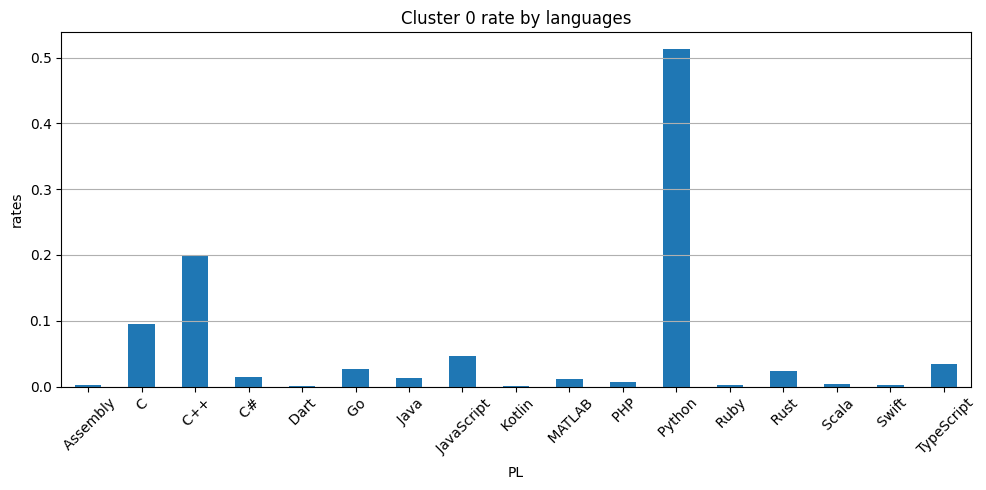

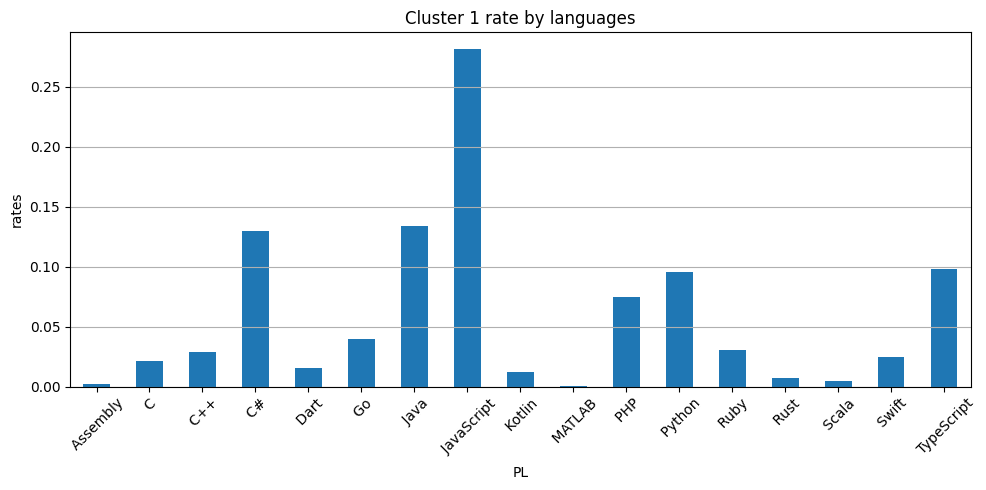

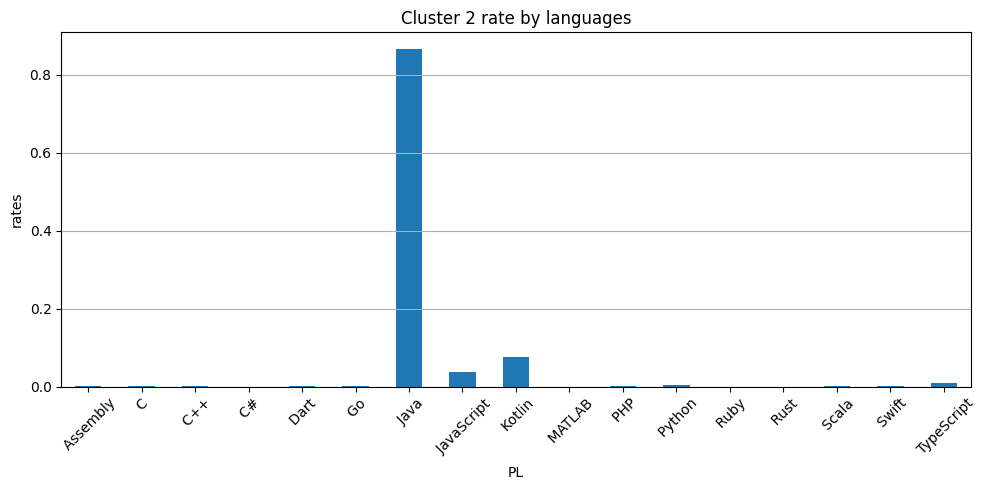

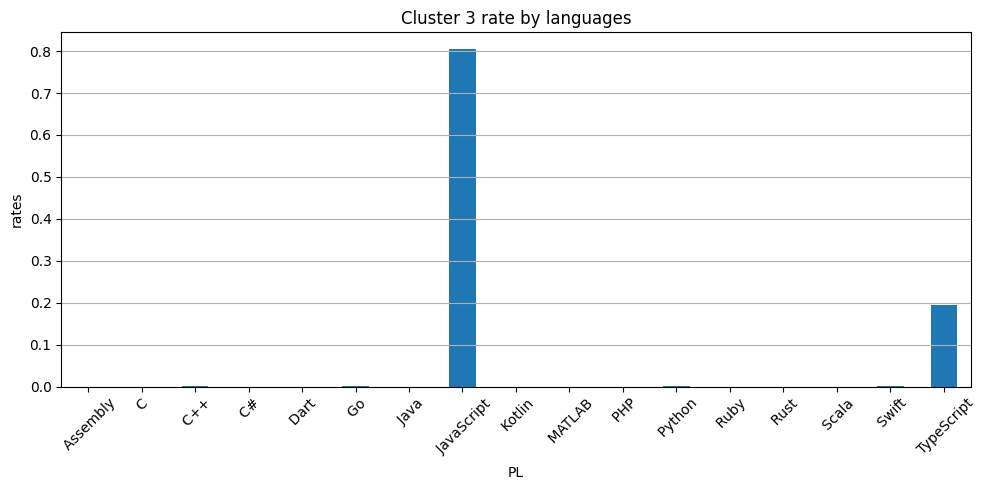

In [ ]:
language_columns = df_combined.columns[1:-1]  # 'Ïú†Ï†Ä', 'ID', ..., 'cluster' Ï†úÏô∏

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú® Í≥ÑÏÇ∞
cluster_profiles = df_combined.groupby('cluster')[language_columns].mean()

# ÏãúÍ∞ÅÌôî: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú®
for cluster_id in cluster_profiles.index:
    plt.figure(figsize=(10, 5))
    cluster_profiles.loc[cluster_id].plot(kind='bar')
    plt.title(f"Cluster {cluster_id} rate by languages")
    plt.ylabel("rates")
    plt.xlabel("PL")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
probs = gmm.predict_proba(X_pca)  # ÎòêÎäî GMMÏóê ÏÇ¨Ïö©Ìïú ÏûÖÎ†• (X_scaled Îì±)
# Î™á Î™Ö ÎΩëÏùÑÏßÄ ÏÑ§Ï†ï
top_n = 5

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ top_n ÏÇ¨Ïö©Ïûê ID Ï∂úÎ†•
for cluster_id in range(gmm.n_components):
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú ÏÜåÏÜç ÌôïÎ•† Î≤°ÌÑ∞
    cluster_probs = probs[:, cluster_id]

    # ÌôïÎ•† ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ïÎ†¨
    top_indices = np.argsort(cluster_probs)[::-1][:top_n]

    print(f"\nüîπ Cluster {cluster_id} ÏÉÅÏúÑ {top_n} ÎåÄÌëúÏûê:")
    for rank, idx in enumerate(top_indices, 1):
        user_id = df_combined.iloc[idx]['Ïú†Ï†Ä ID']
        prob = cluster_probs[idx]
        print(f"  {rank}. ID: {user_id} (ÌôïÎ•†: {prob:.4f})")



üîπ Cluster 0 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: mxxo (ÌôïÎ•†: 0.9998)
  2. ID: mxxo (ÌôïÎ•†: 0.9998)
  3. ID: kali-muon (ÌôïÎ•†: 0.9998)
  4. ID: kali-muon (ÌôïÎ•†: 0.9998)
  5. ID: nidhi-desai (ÌôïÎ•†: 0.9998)

üîπ Cluster 1 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: chrisrochford (ÌôïÎ•†: 1.0000)
  2. ID: chrisrochford (ÌôïÎ•†: 1.0000)
  3. ID: Ankhana (ÌôïÎ•†: 1.0000)
  4. ID: Ankhana (ÌôïÎ•†: 1.0000)
  5. ID: xiaodekaixin (ÌôïÎ•†: 1.0000)

üîπ Cluster 2 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: shivayogih (ÌôïÎ•†: 0.9996)
  2. ID: mendeleev23 (ÌôïÎ•†: 0.9996)
  3. ID: shivayogih (ÌôïÎ•†: 0.9996)
  4. ID: mendeleev23 (ÌôïÎ•†: 0.9996)
  5. ID: max-zhilin (ÌôïÎ•†: 0.9996)

üîπ Cluster 3 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: katieburak (ÌôïÎ•†: 0.9997)
  2. ID: AkshantUjjwal (ÌôïÎ•†: 0.9997)
  3. ID: KaueFernandes01 (ÌôïÎ•†: 0.9997)
  4. ID: Refagi (ÌôïÎ•†: 0.9997)
  5. ID: AbhinavaSanthosh (ÌôïÎ•†: 0.9997)


# 3. Solution: Do not use PCA

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, pairwise_distances

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
X_input = X  # PCA ÏÇ¨Ïö© X

# 2. GMM ÌïôÏäµ
gmm_pure = GaussianMixture(n_components=4, random_state=42)
gmm_pure.fit(X)
labels = gmm_pure.predict(X)

# 3. ÌèâÍ∞Ä
sil_score_pure = silhouette_score(X, labels)
print("Silhouette score without PCA:", sil_score_pure)
# Dunn Index Ìï®Ïàò Ï†ïÏùò
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    distances = pairwise_distances(X)

    inter_cluster_distances = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == i]
            cluster_j = X[labels == j]
            inter_dist = np.min(pairwise_distances(cluster_i, cluster_j))
            inter_cluster_distances.append(inter_dist)

    intra_cluster_distances = []
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        intra_dist = np.max(pairwise_distances(cluster_i))
        intra_cluster_distances.append(intra_dist)

    min_inter = np.min(inter_cluster_distances)
    max_intra = np.max(intra_cluster_distances)

    return min_inter / max_intra

# Dunn Index Í≥ÑÏÇ∞
dunn_pure = dunn_index(X, labels)
print('Dunn Index of GMM:', dunn_pure)

Silhouette score without PCA: -0.019065078957585996
Dunn Index of GMM: 0.005248638810827311


In [8]:
probs = gmm_pure.predict_proba(X)
probs[0]

array([7.14480503e-14, 3.09889108e-16, 5.66957556e-10, 9.99999999e-01])

In [ ]:
# ÌïÑÏöîÏãú ÏÇ¨Ïö©. pcaÎ•º Ïù¥ÎØ∏ Ïã§ÌñâÌï¥Î≤ÑÎ†∏Îã§Î©¥ ÏÇ¨Ïö©Ìï† Í≤É. Í∏∞Ï°¥ cluster Ïª¨Îüº ÏÇ≠Ï†ú
df.drop('cluster', axis=1, inplace=True)

In [10]:
df['cluster'] = labels

# CSVÎ°ú Ï†ÄÏû•
df.to_csv('/content/drive/MyDrive/Colab Notebooks/COSE471/test/final_profiles_with_clusters.csv', index=False)

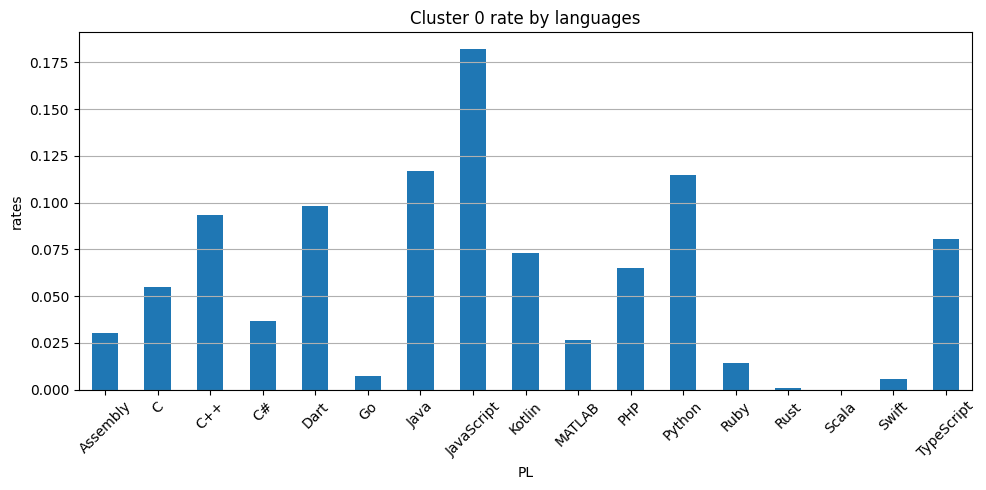

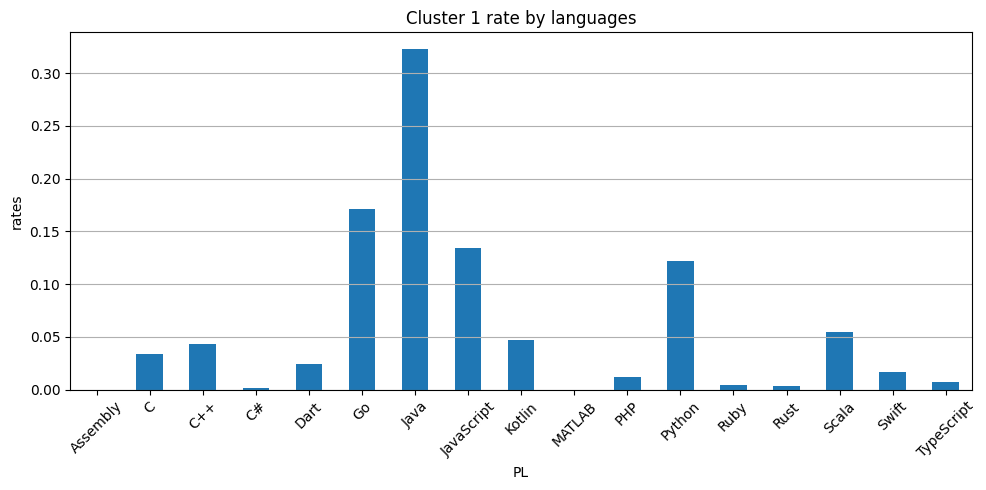

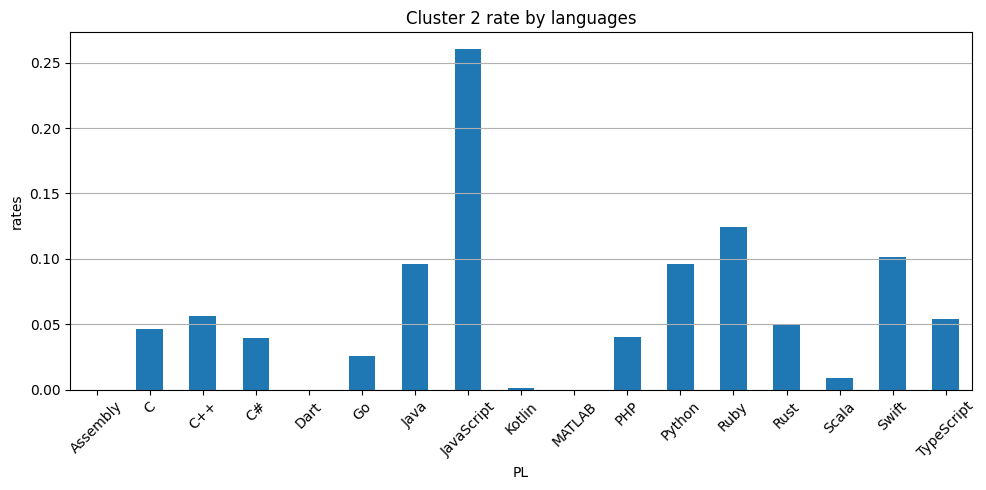

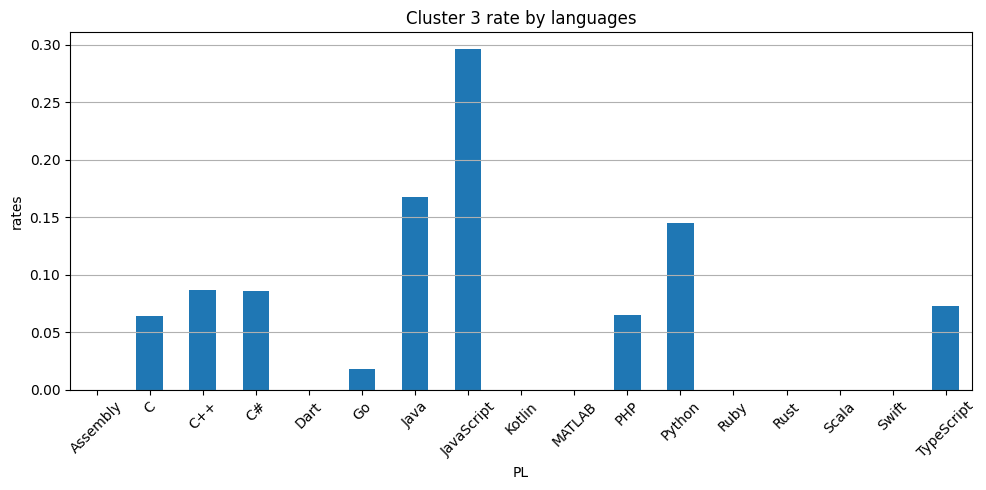

In [11]:
language_columns = df.columns[3:-1]  # 'Ïú†Ï†Ä', 'ID', ..., 'cluster' Ï†úÏô∏

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú® Í≥ÑÏÇ∞
cluster_profiles = df.groupby('cluster')[language_columns].mean()

# ÏãúÍ∞ÅÌôî: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú®
for cluster_id in cluster_profiles.index:
    plt.figure(figsize=(10, 5))
    cluster_profiles.loc[cluster_id].plot(kind='bar')
    plt.title(f"Cluster {cluster_id} rate by languages")
    plt.ylabel("rates")
    plt.xlabel("PL")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [13]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
probs = gmm_pure.predict_proba(X)  # ÎòêÎäî GMMÏóê ÏÇ¨Ïö©Ìïú ÏûÖÎ†• (X_scaled Îì±)
# Î™á Î™Ö ÎΩëÏùÑÏßÄ ÏÑ§Ï†ï
top_n = 5

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ top_n ÏÇ¨Ïö©Ïûê ID Ï∂úÎ†•
for cluster_id in range(gmm_pure.n_components):
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú ÏÜåÏÜç ÌôïÎ•† Î≤°ÌÑ∞
    cluster_probs = probs[:, cluster_id]

    # ÌôïÎ•† ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ïÎ†¨
    top_indices = np.argsort(cluster_probs)[::-1][:top_n]

    print(f"\nüîπ Cluster {cluster_id} ÏÉÅÏúÑ {top_n} ÎåÄÌëúÏûê:")
    for rank, idx in enumerate(top_indices, 1):
        username = df.iloc[idx]['username']
        prob = cluster_probs[idx]
        print(f"  {rank}. ID: {username} (ÌôïÎ•†: {prob:.4f})")


üîπ Cluster 0 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: pablophg (ÌôïÎ•†: 1.0000)
  2. ID: mkjiau (ÌôïÎ•†: 1.0000)
  3. ID: j4nk3e (ÌôïÎ•†: 1.0000)
  4. ID: broftkd (ÌôïÎ•†: 1.0000)
  5. ID: ilent2 (ÌôïÎ•†: 1.0000)

üîπ Cluster 1 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: swdee (ÌôïÎ•†: 1.0000)
  2. ID: dongjiang1989 (ÌôïÎ•†: 1.0000)
  3. ID: felipegutierrez (ÌôïÎ•†: 1.0000)
  4. ID: devagorilla (ÌôïÎ•†: 1.0000)
  5. ID: bsdnet (ÌôïÎ•†: 1.0000)

üîπ Cluster 2 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: abuecker (ÌôïÎ•†: 1.0000)
  2. ID: marekstachura (ÌôïÎ•†: 1.0000)
  3. ID: marcomedina (ÌôïÎ•†: 1.0000)
  4. ID: stakkato95 (ÌôïÎ•†: 1.0000)
  5. ID: guzuomuse (ÌôïÎ•†: 1.0000)

üîπ Cluster 3 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: FilixXxMal (ÌôïÎ•†: 1.0000)
  2. ID: fdecaire (ÌôïÎ•†: 1.0000)
  3. ID: budul100 (ÌôïÎ•†: 1.0000)
  4. ID: hunix (ÌôïÎ•†: 1.0000)
  5. ID: wladmis (ÌôïÎ•†: 1.0000)


# 4. What if the use of UMAP with 5 dimensions?

In [31]:
import umap
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

In [32]:
# UMAPÏúºÎ°ú 5Ï∞®Ïõê Ï∂ïÏÜå
reducer = umap.UMAP(n_components=5, random_state=42)
X_umap = reducer.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [42]:
# 2. GMM ÌïôÏäµ
bic_scores = []
for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_umap)
    bic_scores.append(gmm.bic(X_umap))
# ÏµúÏÜå BIC Í∞íÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÏÇ¨Ïö©
optimal_k = np.argmin(bic_scores) + 2

# ÏµúÏ†Å kÏóê ÎåÄÌï¥ GMM Ïû¨ÌïôÏäµÌïòÍ≥† labels ÏòàÏ∏°
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
labels = gmm.fit_predict(X_umap)

# 4. Silhouette Score
sil_score = silhouette_score(X_umap, labels)
print("Silhouette score with UMAP:", sil_score)
# Dunn Index Ìï®Ïàò Ï†ïÏùò
def dunn_index(X, labels):
    n_clusters = len(np.unique(labels))
    distances = pairwise_distances(X)

    inter_cluster_distances = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == i]
            cluster_j = X[labels == j]
            inter_dist = np.min(pairwise_distances(cluster_i, cluster_j))
            inter_cluster_distances.append(inter_dist)

    intra_cluster_distances = []
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        intra_dist = np.max(pairwise_distances(cluster_i))
        intra_cluster_distances.append(intra_dist)

    min_inter = np.min(inter_cluster_distances)
    max_intra = np.max(intra_cluster_distances)

    return min_inter / max_intra

# Dunn Index Í≥ÑÏÇ∞
dunn = dunn_index(X_umap, labels)
print("Dunn Index with UMAP:", dunn)
print(optimal_k)

Silhouette score with UMAP: 0.35568354
Dunn Index with UMAP: 0.00041984764
9


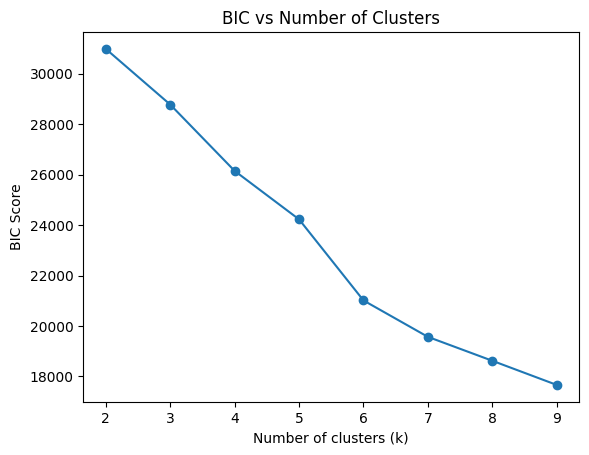

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), bic_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("BIC Score")
plt.title("BIC vs Number of Clusters")
plt.show()

In [43]:
probs = gmm.predict_proba(X_umap)
probs[0]

array([2.60437788e-001, 1.58926410e-030, 7.39562210e-001, 6.39926412e-174,
       1.99951314e-009, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000])

In [44]:
df = df.drop('cluster', axis=1)

In [45]:
df['cluster'] = labels

# CSVÎ°ú Ï†ÄÏû•
df.to_csv('/content/drive/MyDrive/Colab Notebooks/COSE471/test/final_profiles_with_clusters.csv', index=False)

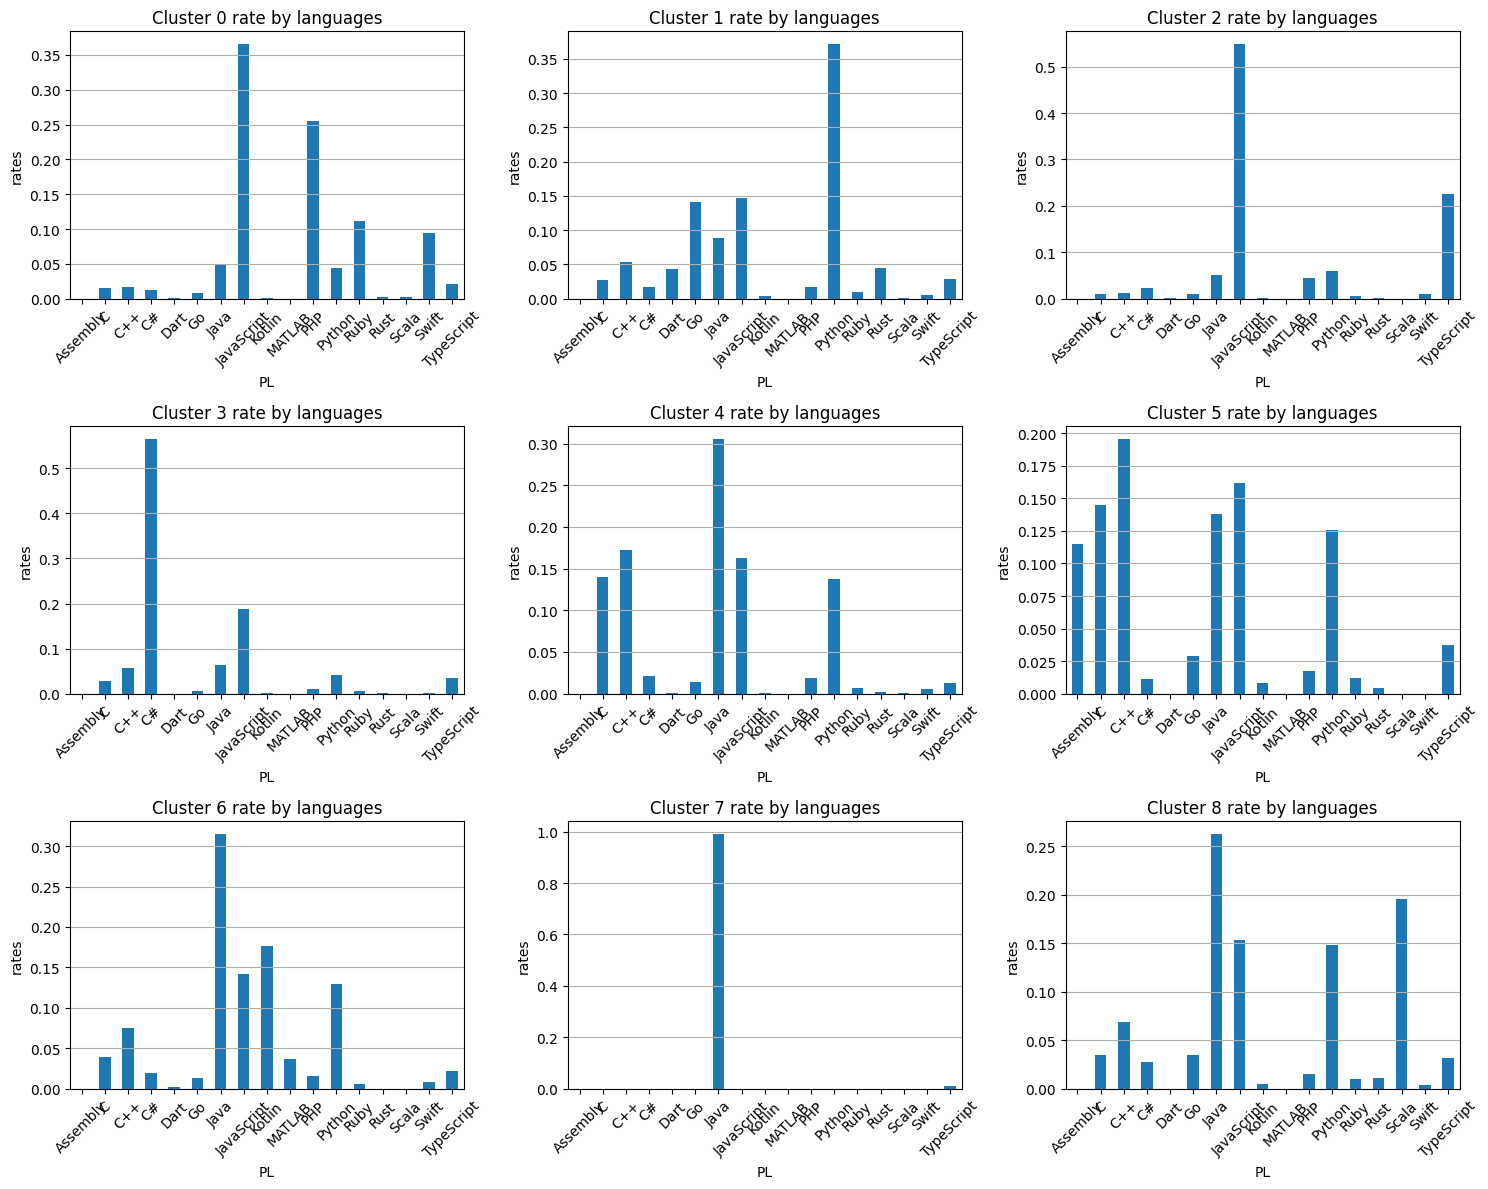

In [47]:
language_columns = df.columns[3:-1]  # 'Ïú†Ï†Ä', 'ID', ..., 'cluster' Ï†úÏô∏

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïñ∏Ïñ¥ ÎπÑÏú® Í≥ÑÏÇ∞
cluster_profiles = df.groupby('cluster')[language_columns].mean()

# ÏãúÍ∞ÅÌôî: ÌïòÎÇòÏùò Í∑∏Î¶ºÏóê 2x2 ÏÑúÎ∏åÌîåÎ°ØÏúºÎ°ú ÌëúÏãú
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) # Í∑∏Î¶º ÌÅ¨Í∏∞ Ï°∞Ï†à
axes = axes.flatten() # 2x2 Î∞∞Ïó¥ÏùÑ 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì¨ (Ïù∏Îç±Ïã±ÏùÑ ÏâΩÍ≤å ÌïòÍ∏∞ ÏúÑÌï®)

for i, cluster_id in enumerate(cluster_profiles.index):
    ax = axes[i]
    cluster_profiles.loc[cluster_id].plot(kind='bar', ax=ax)
    ax.set_title(f"Cluster {cluster_id} rate by languages")
    ax.set_ylabel("rates")
    ax.set_xlabel("PL")
    ax.tick_params(axis='x', rotation=45) # xÏ∂ï Î†àÏù¥Î∏î ÌöåÏ†Ñ
    ax.grid(axis='y')

plt.tight_layout() # ÏÑúÎ∏åÌîåÎ°Ø Í∞ÑÏùò Í∞ÑÍ≤© ÏûêÎèô Ï°∞Ï†à
plt.show()

In [48]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
probs = gmm.predict_proba(X_umap)  # ÎòêÎäî GMMÏóê ÏÇ¨Ïö©Ìïú ÏûÖÎ†• (X_scaled Îì±)
# Î™á Î™Ö ÎΩëÏùÑÏßÄ ÏÑ§Ï†ï
top_n = 5

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ top_n ÏÇ¨Ïö©Ïûê ID Ï∂úÎ†•
for cluster_id in range(gmm.n_components):
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú ÏÜåÏÜç ÌôïÎ•† Î≤°ÌÑ∞
    cluster_probs = probs[:, cluster_id]

    # ÌôïÎ•† ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ïÎ†¨
    top_indices = np.argsort(cluster_probs)[::-1][:top_n]

    print(f"\nüîπ Cluster {cluster_id} ÏÉÅÏúÑ {top_n} ÎåÄÌëúÏûê:")
    for rank, idx in enumerate(top_indices, 1):
        username = df.iloc[idx]['username']
        prob = cluster_probs[idx]
        print(f"  {rank}. ID: {username} (ÌôïÎ•†: {prob:.4f})")


üîπ Cluster 0 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: pleonard212 (ÌôïÎ•†: 1.0000)
  2. ID: lkaina (ÌôïÎ•†: 1.0000)
  3. ID: Mojgan-Jelodar (ÌôïÎ•†: 1.0000)
  4. ID: dfvg (ÌôïÎ•†: 1.0000)
  5. ID: faceleg (ÌôïÎ•†: 1.0000)

üîπ Cluster 1 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: matthewtsmith (ÌôïÎ•†: 1.0000)
  2. ID: azeymur (ÌôïÎ•†: 1.0000)
  3. ID: yoshihitoh (ÌôïÎ•†: 1.0000)
  4. ID: gitbufenshuo (ÌôïÎ•†: 1.0000)
  5. ID: guzuomuse (ÌôïÎ•†: 1.0000)

üîπ Cluster 2 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: arielbouskila (ÌôïÎ•†: 1.0000)
  2. ID: shaunburdick (ÌôïÎ•†: 1.0000)
  3. ID: SparkFountain (ÌôïÎ•†: 1.0000)
  4. ID: inidaname (ÌôïÎ•†: 1.0000)
  5. ID: kumarryogeshh (ÌôïÎ•†: 1.0000)

üîπ Cluster 3 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: pianomanjh (ÌôïÎ•†: 1.0000)
  2. ID: DaveCS1 (ÌôïÎ•†: 1.0000)
  3. ID: brandonbisel (ÌôïÎ•†: 1.0000)
  4. ID: pjcollins (ÌôïÎ•†: 1.0000)
  5. ID: makcakaya (ÌôïÎ•†: 1.0000)

üîπ Cluster 4 ÏÉÅÏúÑ 5 ÎåÄÌëúÏûê:
  1. ID: gemarcano (ÌôïÎ•†: 1.0000)
  2. ID: xiaoyangxie (ÌôïÎ•†: 1.0000)
  3. I